In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

import pandas_profiling as pp
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

import re

In [2]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
df = pd.read_excel('House_data.xlsx')

In [4]:
df_xtest = pd.read_excel('House_test.xlsx')

In [5]:
df_ytest = pd.read_excel('Price_test.xlsx')

### Kiểm tra info của từng tập dữ liệu

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4386 non-null   int64  
 1   Noi_dung           4386 non-null   object 
 2   Dia_chi            4386 non-null   object 
 3   Gia                4386 non-null   object 
 4   Nha_ve_sinh        4386 non-null   object 
 5   So_phong           4386 non-null   object 
 6   Huong              4386 non-null   object 
 7   Chieu_dai          4386 non-null   float64
 8   Rong               4386 non-null   float64
 9   Giay_to            4386 non-null   object 
 10  Cau_truc           4386 non-null   object 
 11  Dien_tich          4386 non-null   object 
 12  Dien_tich_su_dung  4386 non-null   object 
 13  Hem_rong           4386 non-null   float64
 14  Duong_mat_tien     4386 non-null   float64
 15  Tien_ich           3551 non-null   object 
 16  Duong              4386 

In [7]:
df_xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1458 non-null   int64  
 1   Noi_dung           1458 non-null   object 
 2   Dia_chi            1458 non-null   object 
 3   Nha_ve_sinh        1458 non-null   object 
 4   So_phong           1458 non-null   object 
 5   Huong              1458 non-null   object 
 6   Chieu_dai          1458 non-null   float64
 7   Rong               1458 non-null   float64
 8   Giay_to            1458 non-null   object 
 9   Cau_truc           1458 non-null   object 
 10  Dien_tich          1458 non-null   object 
 11  Dien_tich_su_dung  1458 non-null   float64
 12  Hem_rong           1458 non-null   float64
 13  Duong_mat_tien     1458 non-null   float64
 14  Tien_ich           1173 non-null   object 
 15  Duong              1458 non-null   object 
 16  Phuong             1458 

In [8]:
df_ytest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gia (tỷ)     1458 non-null   float64
 1   Gia (triệu)  1458 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [9]:
df.head()

ID                                           Noi_dung  \
0  149065  Bán nhà 134.7m2 Tân Hiệp Hóc Môn. Cách Đỗ Văn ...   
1  231326  Bán Nhà Nát Gần Mặt Tiền Đường Hậu Giang P11 Q...   
2  184984  Bán nhà riêng Quận Gò Vấp - Nhà còn mới phù hợ...   
3  205270  Bán Nhà Hẻm Đường Huỳnh Tấn Phát, xã Phú Xuân ...   
4  307136  Bán Nhà Hẻm 3m Lò Siêu, DT: 5,2x10m, Trệt Lửng...   

                                           Dia_chi                     Gia  \
0  Đường ấp Thới Tây 2, Xã Tân Hiệp, Huyện Hóc Môn    3,7 tỷ 35,4 triệu/m²   
1               Đường Hậu Giang, Phường 11, Quận 6    3,9 tỷ 92,2 triệu/m²   
2  Đường Nguyễn Thượng Hiền, Phường 1, Quận Gò Vấp       2 tỷ 99 triệu/m²    
3  Đường Huỳnh Tấn Phát, Xã Phú Xuân, Huyện Nhà Bè   3,8 tỷ 52,9 triệu/m²    
4                Đường Lò Siêu, Phường 16, Quận 11  6,5 tỷ 124,8 triệu/m²    

  Nha_ve_sinh So_phong  Huong  Chieu_dai  Rong  Giay_to  \
0           4        3  Đ.Bắc      20.71  5.00  Sổ hồng   
1           1       --    Tây      12.90  3.00  Sổ hồng   
2           2     --    T.Nam       3.20  4.65  Sổ hồng   
3           2        2  Đ.Bắc      14.35  5.00  Sổ hồng   
4           5        5  T.Nam      10.00  5.20  Sổ hồng   

                                    Cau_truc Dien_tich Dien_tich_su_dung  \
0                             1 trệt + 1 lầu     104.5             134.7   
1                                     1 trệt      42.3              87.7   
2                           1 trệt, 1 lửng        20.2               150   
3                           1 trệt + 1 lầu        71.8             137.6   
4    1 trệt, 1 lửng, 1 tầng thượng + 2 lầu        52.1              70.3   

   Hem_rong  Duong_mat_tien  \
0       5.0             0.0   
1       6.1             0.0   
2       3.0             0.0   
3       5.0             0.0   
4       0.0             5.0   

                                            Tien_ich  \
0  Gần chợ, siêu thị Gần bệnh viện Gần công viên,...   
1  Gần chợ, siêu thị Gần công viên, trung tâm Di ...   
2   Gần chợ, siêu thị Gần công viên, trung tâm Gầ...   
3   Gần chợ, siêu thị Gần bệnh viện Gần công viên...   
4                                                NaN   

                      Duong        Phuong            Quan  
0       Đường ấp Thới Tây 2   Xã Tân Hiệp   Huyện Hóc Môn  
1           Đường Hậu Giang     Phường 11          Quận 6  
2  Đường Nguyễn Thượng Hiền      Phường 1     Quận Gò Vấp  
3      Đường Huỳnh Tấn Phát   Xã Phú Xuân    Huyện Nhà Bè  
4             Đường Lò Siêu     Phường 16         Quận 11

In [10]:
df.isnull().sum()

ID                     0
Noi_dung               0
Dia_chi                0
Gia                    0
Nha_ve_sinh            0
So_phong               0
Huong                  0
Chieu_dai              0
Rong                   0
Giay_to                0
Cau_truc               0
Dien_tich              0
Dien_tich_su_dung      0
Hem_rong               0
Duong_mat_tien         0
Tien_ich             835
Duong                  0
Phuong                 0
Quan                   0
dtype: int64

### Nhận xét
 * Biến giá trong tập train còn là kiểu object và có thể có giá trị null thực hiện đổi kiểu dữ liệu và loại bỏ giá trị null cho giá
 * Có một vài kiểu dữ liệu chưa đúng với tính chất thực hiện thay đổi cho phù hợp

In [11]:
df["Gia"]

0         3,7 tỷ 35,4 triệu/m²
1         3,9 tỷ 92,2 triệu/m²
2            2 tỷ 99 triệu/m² 
3        3,8 tỷ 52,9 triệu/m² 
4       6,5 tỷ 124,8 triệu/m² 
                 ...          
4381    6,6 tỷ 121,3 triệu/m² 
4382      4,6 tỷ 126 triệu/m² 
4383    3,85 tỷ 76,2 triệu/m² 
4384     4,2 tỷ 132,9 triệu/m²
4385     4,7 tỷ 73,3 triệu/m² 
Name: Gia, Length: 4386, dtype: object

In [12]:
df['Gia'] = df['Gia'].str.slice(0,4)
df['Gia']

0       3,7 
1       3,9 
2       2 tỷ
3       3,8 
4       6,5 
        ... 
4381    6,6 
4382    4,6 
4383    3,85
4384    4,2 
4385    4,7 
Name: Gia, Length: 4386, dtype: object

In [13]:
df['Gia']=df['Gia'].str.replace('[tỷ t]','')

In [14]:
df['Gia']

0        3,7
1        3,9
2          2
3        3,8
4        6,5
        ... 
4381     6,6
4382     4,6
4383    3,85
4384     4,2
4385     4,7
Name: Gia, Length: 4386, dtype: object

In [15]:
df['Gia'].str.contains('Đã').value_counts()

False    4304
True       82
Name: Gia, dtype: int64

### Chuyển các giá trị trong cột giá từ object thành kiểu số

In [16]:
df['Gia']= df['Gia'].str.replace(',','.',regex =False)
df['Gia']= df['Gia'].str.replace('[A-Za-z]','')
df['Gia'] = pd.to_numeric(df['Gia'],errors='coerce')

In [17]:
df['Gia']

0       3.70
1       3.90
2       2.00
3       3.80
4       6.50
        ... 
4381    6.60
4382    4.60
4383    3.85
4384    4.20
4385    4.70
Name: Gia, Length: 4386, dtype: float64

In [18]:
df[df['Gia']>50]

ID                                           Noi_dung  \
5     265154             Cần bán nhà riêng phường An Phú Quận 2   
152   109013  Nhà Phú Nhuận, mặt tiền, đang cho thuê, sổ hồn...   
393   346582  BÁN NHÀ HAI MẶT TIỀN ĐƯỜNG PHƯỜNG 2 QUẬN PHÚ N...   
1152  328051  BÁN KHÁCH SẠN MẶT TIỀN PHƯỜNG BẾN THÀNH QUẬN 1...   
1303  234801        BÁN NHÀ HAI MẶT TIỀN TRẦN QUÝ KHOÁCH QUẬN 1   
1375  306144  Cần bán nhà 4 tầng, có hầm, mặt tiền đường 6m,...   
1483  307046  Bán tòa nhà Office Building quận Phú Nhuận phư...   
1592  121071             Bán nhà riêng Quận 6 - Gần Phố Ẩm Thực   
1969  156480  Bán dãy trọ 18 phòng 2 mặt tiền đường Quận 7- ...   
2127  278397  Bán biệt thự kiểu Pháp Quận 7- Nhà đẹp, có sân...   
2310  110315  Bán nhà quận 7 -  Nhà khu dân cư an ninh dân t...   
2412  152365  Bán nhà mặt tiền đường ngay trung tâm Quận 5 -...   
2476  360165  Bán Nhà Mặt Tiền Kinh Doanh Đường Ba Tháng Hai...   
2514  358444  BÁN TÒA NHÀ LÀM CĂN HỘ DỊCH VỤ 1 TRỆT 1 LỬNG 3...   
2590  304933  Bán nhà mặt tiền đường nội bộ P.15, Q.11 - Gần...   
2606   79771  Bán nhà mặt tiền kinh doanh , phường Tăng Nhơn...   
2704  321513           BÁN NHÀ 1 HẦM 1 TRỆT 7 LẦU 1 LỬNG QUẬN 3   
2925  339519        BÁN TÒA NHÀ SIÊU ĐẸP PHƯỜNG TÂN ĐỊNH QUẬN 1   
3710  319944  Bán tòa nhà mặt tiền đường P11 Q10 - Khu trung...   
4104  347947  Bán nhà 2 mặt tiền khu đô thị An Phú An Khánh,...   
4288  315452  Bán nhà hẻm xe hơi có sẵn 20 phòng quận Phú Nhuận   

                                              Dia_chi    Gia Nha_ve_sinh  \
5                 Đường An Phú, Phường An Phú, Quận 2   54.0           5   
152     Đường Phan Đăng Lưu, Phường 3, Quận Phú Nhuận   65.0          32   
393            Đường Cù Lao, Phường 2, Quận Phú Nhuận   52.0           5   
1152   Đường Nguyễn An Ninh, Phường Bến Thành, Quận 1   99.0          27   
1303   Đường Trần Quý Khoách, Phường Tân Định, Quận 1   51.0          20   
1375          Đường Số 2, Phường Thạnh Mỹ Lợi, Quận 2   91.0           8   
1483  Đường Nguyễn Văn Trỗi, Phường 8, Quận Phú Nhuận   56.0           5   
1592        Đường Kinh Dương Vương, Phường 12, Quận 6  125.0           1   
1969  Đường Hoàng Quốc Việt, Phường Phú Thuận, Quận 7   85.0          18   
2127    Đường Nguyễn Thị Thập, Phường Tân Phú, Quận 7   53.0           4   
2310              Đường Số 81, Phường Tân Quy, Quận 7   75.0          85   
2412            Đường Bùi Hữu Nghĩa, Phường 7, Quận 5   55.0           6   
2476           Đường Ba Tháng Hai, Phường 14, Quận 10   56.0           1   
2514               Đường Lê Văn Sỹ, Phường 14, Quận 3   68.0          38   
2590         Đường Lý Thường Kiệt, Phường 15, Quận 11   90.0           1   
2606       Đường Số 2, Phường Tăng Nhơn Phú B, Quận 9   60.0           2   
2704                Đường Cao Thắng, Phường 2, Quận 3  101.0          15   
2925   Đường Trần Quang Khải, Phường Tân Định, Quận 1   51.9           5   
3710          Đường Điện Biên Phủ, Phường 11, Quận 10   85.0          10   
4104        Đường Dương Văn An, Phường An Phú, Quận 2   61.0           6   
4288       Đường Lê Văn Sỹ, Phường 10, Quận Phú Nhuận   52.0          20   

     So_phong  Huong  Chieu_dai   Rong  Giay_to  \
5           4  Đ.Bắc      30.00  12.00    Sổ đỏ   
152        32  T.Bắc      17.85  15.95  Sổ hồng   
393         3  Đ.Nam      33.00   5.70  Sổ hồng   
1152       26  Đ.Nam      20.95   4.20  Sổ hồng   
1303       19    Nam      15.00   8.00  Sổ hồng   
1375       11  Đ.Bắc      46.14  24.07  Sổ hồng   
1483        4  T.Nam      18.20  20.30  Sổ hồng   
1592       --  T.Bắc      56.60  21.00  Sổ hồng   
1969       18  T.Nam      68.00  10.90  Sổ hồng   
2127        4    Tây      30.00  16.00  Sổ hồng   
2310       84  Đ.Bắc      31.60  16.00  Sổ hồng   
2412     --    T.Nam      19.80   7.90  Sổ hồng   
2476        1    Nam      23.90   7.24  Sổ hồng   
2514       38  T.Bắc      21.56   7.36  Sổ hồng   
2590     --    T.Bắc      32.20  18.00  Sổ hồng   
2606        4    Nam      30.46  21.24  Sổ hồn

In [19]:
df['Gia'].isna().value_counts()

False    4304
True       82
Name: Gia, dtype: int64

### Thực hiện drop các dòng mang giá trị NaN trong cột giá 
* Đặt tên df thành df_train

In [20]:
df_train = df.drop(df[df['Gia'].isna()].index)

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 0 to 4385
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4304 non-null   int64  
 1   Noi_dung           4304 non-null   object 
 2   Dia_chi            4304 non-null   object 
 3   Gia                4304 non-null   float64
 4   Nha_ve_sinh        4304 non-null   object 
 5   So_phong           4304 non-null   object 
 6   Huong              4304 non-null   object 
 7   Chieu_dai          4304 non-null   float64
 8   Rong               4304 non-null   float64
 9   Giay_to            4304 non-null   object 
 10  Cau_truc           4304 non-null   object 
 11  Dien_tich          4304 non-null   object 
 12  Dien_tich_su_dung  4304 non-null   object 
 13  Hem_rong           4304 non-null   float64
 14  Duong_mat_tien     4304 non-null   float64
 15  Tien_ich           3481 non-null   object 
 16  Duong              4304 

In [22]:
df_train['Gia'] = df_train['Gia']*1000

### Thay đổi kiểu dữ liệu cho các cột tương ứng trong tập train và test


### Thực hiện đổi kiểu dữ liệu trên tập train

In [23]:
cols_is_num =['So_phong','Nha_ve_sinh','Dien_tich','Dien_tich_su_dung']
for col in cols_is_num:
    df_train[col]=pd.to_numeric(df_train[col],errors='coerce')
    

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 0 to 4385
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4304 non-null   int64  
 1   Noi_dung           4304 non-null   object 
 2   Dia_chi            4304 non-null   object 
 3   Gia                4304 non-null   float64
 4   Nha_ve_sinh        4293 non-null   float64
 5   So_phong           4227 non-null   float64
 6   Huong              4304 non-null   object 
 7   Chieu_dai          4304 non-null   float64
 8   Rong               4304 non-null   float64
 9   Giay_to            4304 non-null   object 
 10  Cau_truc           4304 non-null   object 
 11  Dien_tich          4300 non-null   float64
 12  Dien_tich_su_dung  4299 non-null   float64
 13  Hem_rong           4304 non-null   float64
 14  Duong_mat_tien     4304 non-null   float64
 15  Tien_ich           3481 non-null   object 
 16  Duong              4304 

In [25]:
df_train['Duong_mat_tien'].unique()

array([ 0.  ,  5.  , 12.  ,  8.  , 16.  , 30.  , 10.  , 15.  ,  8.93,
        4.  , 20.  ,  6.  , 14.  , 11.23, 40.  ,  1.81,  4.5 ,  4.35,
        6.5 , 30.5 ,  4.6 , 60.  ,  9.  , 18.  , 13.  ,  3.5 ,  3.8 ,
        7.  ,  5.1 , 12.39,  3.  ,  8.1 ,  7.18,  8.78, 25.  ,  2.  ,
       11.13, 28.  ,  7.5 ,  4.72,  4.2 , 26.  , 17.  , 12.8 ,  2.5 ,
       12.5 ,  4.3 , 21.  ,  4.43, 11.  , 50.  ,  8.2 , 24.  ,  4.1 ,
       33.  , 12.74,  7.92,  4.24,  3.2 , 15.28,  5.5 ,  1.9 ,  6.25])

### Nhận xét
* Sau khi đổi sang kiểu số cho các dữ liệu thì xuất hiện giá trị null thực hiện thay thế giá trị null bằng giá trị trung bình
* Cột đường mặt tiền mang tính chất categorical nên thực hiện đổi các giá trị số khác trong cột thành 1

In [26]:
cols_not_zero =['So_phong','Nha_ve_sinh','Dien_tich','Dien_tich_su_dung']
for col in cols_not_zero:
    df_train[col]=df_train[col].replace(0,np.NaN)
    mean = int(df_train[col].mean(skipna=True))
    df_train[col]=df_train[col].replace(np.NaN,mean)

In [27]:
df_train["Duong_mat_tien"] = df_train["Duong_mat_tien"].apply(lambda x : 0 if x == 0 else 1)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 0 to 4385
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4304 non-null   int64  
 1   Noi_dung           4304 non-null   object 
 2   Dia_chi            4304 non-null   object 
 3   Gia                4304 non-null   float64
 4   Nha_ve_sinh        4304 non-null   float64
 5   So_phong           4304 non-null   float64
 6   Huong              4304 non-null   object 
 7   Chieu_dai          4304 non-null   float64
 8   Rong               4304 non-null   float64
 9   Giay_to            4304 non-null   object 
 10  Cau_truc           4304 non-null   object 
 11  Dien_tich          4304 non-null   float64
 12  Dien_tich_su_dung  4304 non-null   float64
 13  Hem_rong           4304 non-null   float64
 14  Duong_mat_tien     4304 non-null   int64  
 15  Tien_ich           3481 non-null   object 
 16  Duong              4304 

### Thực hiện đổi kiểu dữ liệu trên tập test

In [29]:
df_xtest.head()

ID                                           Noi_dung  \
0  356331  Nhà bán Quận Gò Vấp - Hẻm xe ba gác - Khu dân ...   
1  314792  CẦN BÁN NHÀ MẶT TIỀN ĐƯỜNG CAO THẮNG QUẬN PHÚ ...   
2  338448  Chính chủ bán gấp căn biệt thự vườn, hẻm xe hơ...   
3  349168  Bán Nhà Căn Góc Mặt Tiền Đường Số Phường Tân Q...   
4  357978  Bán Nhà Hai Mặt Hẻm Cách Mạng Tháng Tám - Phườ...   

                                         Dia_chi Nha_ve_sinh So_phong  Huong  \
0   Đường Phạm Văn Chiêu, Phường 14, Quận Gò Vấp           1        2  Đ.Nam   
1     Đường Cao Thắng, Phường 17, Quận Phú Nhuận          11       11  Đ.Nam   
2   Đường Số 12, Phường Trường Thọ, Quận Thủ Đức           6        6  Đ.Bắc   
3            Đường Số 77, Phường Tân Quy, Quận 7           3        2    Nam   
4  Đường Cách Mạng Tháng Tám, Phường 13, Quận 10           1        2  T.Bắc   

   Chieu_dai   Rong  Giay_to                              Cau_truc Dien_tich  \
0      10.29   3.98  Sổ hồng                        1 trệt + 1 lầu      47.6   
1      10.00   5.60  Sổ hồng    1 trệt, 1 lửng, 1 áp mái + 2 lầu        56.6   
2      48.00  30.00  Sổ hồng                      1 trệt + 1 lầu       1.177   
3       6.00   4.00  Sổ hồng                        1 trệt + 2 lầu        24   
4       9.30   2.90  Sổ hồng                      1 trệt + 1 lầu          28   

   Dien_tich_su_dung  Hem_rong  Duong_mat_tien  \
0               95.3       2.0             0.0   
1              186.0       0.0             4.0   
2              309.4       4.0             0.0   
3               72.0       0.0            10.0   
4               56.0       3.0             0.0   

                                            Tien_ich  \
0  Gần chợ, siêu thị Gần trường học Gần mặt tiền ...   
1                                                NaN   
2   Gần chợ, siêu thị Gần công viên, trung tâm Gầ...   
3  Gần chợ, siêu thị Gần công viên, trung tâm Gần...   
4   Gần chợ, siêu thị Gần trường học Gần mặt tiền...   

                       Duong              Phuong             Quan  
0       Đường Phạm Văn Chiêu           Phường 14      Quận Gò Vấp  
1            Đường Cao Thắng           Phường 17   Quận Phú Nhuận  
2                Đường Số 12   Phường Trường Thọ     Quận Thủ Đức  
3                Đường Số 77      Phường Tân Quy           Quận 7  
4  Đường Cách Mạng Tháng Tám           Phường 13          Quận 10

In [30]:
cols_is_num =['So_phong','Nha_ve_sinh','Dien_tich','Dien_tich_su_dung']
for col in cols_is_num:
    df_xtest[col]=pd.to_numeric(df_xtest[col],errors='coerce')

In [31]:
df_xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1458 non-null   int64  
 1   Noi_dung           1458 non-null   object 
 2   Dia_chi            1458 non-null   object 
 3   Nha_ve_sinh        1457 non-null   float64
 4   So_phong           1428 non-null   float64
 5   Huong              1458 non-null   object 
 6   Chieu_dai          1458 non-null   float64
 7   Rong               1458 non-null   float64
 8   Giay_to            1458 non-null   object 
 9   Cau_truc           1458 non-null   object 
 10  Dien_tich          1457 non-null   float64
 11  Dien_tich_su_dung  1458 non-null   float64
 12  Hem_rong           1458 non-null   float64
 13  Duong_mat_tien     1458 non-null   float64
 14  Tien_ich           1173 non-null   object 
 15  Duong              1458 non-null   object 
 16  Phuong             1458 

In [32]:
df_xtest['Duong_mat_tien'].unique()

array([ 0.  ,  4.  , 10.  ,  5.  , 15.  , 12.  ,  6.  ,  8.  ,  7.  ,
       14.  , 30.  , 20.  ,  9.  , 25.  , 13.  , 40.  , 18.  ,  5.5 ,
       16.  , 19.  , 24.  ,  1.  ,  2.  ,  6.5 , 12.5 ,  8.1 , 11.  ,
        8.22,  3.31, 17.  ,  1.5 , 13.5 , 31.  ])

In [33]:
cols_not_zero =['So_phong','Nha_ve_sinh','Dien_tich','Dien_tich_su_dung']
for col in cols_not_zero:
    df_xtest[col]=df_xtest[col].replace(0,np.NaN)
    mean = int(df_xtest[col].mean(skipna=True))
    df_xtest[col]=df_xtest[col].replace(np.NaN,mean)

In [34]:
df_xtest["Duong_mat_tien"] = df_xtest["Duong_mat_tien"].apply(lambda x : 0 if x == 0 else 1)

In [35]:
df_xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1458 non-null   int64  
 1   Noi_dung           1458 non-null   object 
 2   Dia_chi            1458 non-null   object 
 3   Nha_ve_sinh        1458 non-null   float64
 4   So_phong           1458 non-null   float64
 5   Huong              1458 non-null   object 
 6   Chieu_dai          1458 non-null   float64
 7   Rong               1458 non-null   float64
 8   Giay_to            1458 non-null   object 
 9   Cau_truc           1458 non-null   object 
 10  Dien_tich          1458 non-null   float64
 11  Dien_tich_su_dung  1458 non-null   float64
 12  Hem_rong           1458 non-null   float64
 13  Duong_mat_tien     1458 non-null   int64  
 14  Tien_ich           1173 non-null   object 
 15  Duong              1458 non-null   object 
 16  Phuong             1458 

In [36]:
df_ytest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gia (tỷ)     1458 non-null   float64
 1   Gia (triệu)  1458 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


### Tìm mối quan hệ giữa các biến với biến giá

In [37]:
df_train.describe(include='all')

ID                                           Noi_dung  \
count     4304.000000                                               4304   
unique            NaN                                               4051   
top               NaN  Bán nhà hẻm quận Bình Thạnh, - Khu dân cư an n...   
freq              NaN                                                 23   
mean    263485.836664                                                NaN   
std      95482.006975                                                NaN   
min      17258.000000                                                NaN   
25%     184710.000000                                                NaN   
50%     295976.500000                                                NaN   
75%     347975.250000                                                NaN   
max     369574.000000                                                NaN   

                                                  Dia_chi            Gia  \
count                                                4304    4304.000000   
unique                                               1755            NaN   
top     Đường Huỳnh Tấn Phát, Thị trấn Nhà Bè, Huyện N...            NaN   
freq                                                   45            NaN   
mean                                                  NaN    8527.757900   
std                                                   NaN    8135.893841   
min                                                   NaN     870.000000   
25%                                                   NaN    4000.000000   
50%                                                   NaN    6200.000000   
75%                                                   NaN    9800.000000   
max                                                   NaN  125000.000000   

        Nha_ve_sinh     So_phong  Huong    Chieu_dai         Rong  Giay_to  \
count   4304.000000  4304.000000   4304  4304.000000  4304.000000     4304   
unique          NaN          NaN      9          NaN          NaN        4   
top             NaN          NaN  T.Bắc          NaN          NaN  Sổ hồng   
freq            NaN          NaN    800          NaN          NaN     4223   
mean       3.445864     3.722584    NaN    14.481450     4.679326      NaN   
std        3.667615     3.632962    NaN     6.993348     2.231628      NaN   
min        1.000000     1.000000    NaN     1.000000     0.750000      NaN   
25%        2.000000     2.000000    NaN    10.000000     3.550000      NaN   
50%        3.000000     3.000000    NaN    13.500000     4.000000      NaN   
75%        4.000000     4.000000    NaN    18.000000     5.000000      NaN   
max       85.000000    84.000000    NaN   101.460000    30.340000      NaN   

                  Cau_truc    Dien_tich  Dien_tich_su_dung     Hem_rong  \
count                 4304  4304.000000        4304.000000  4304.000000   
unique                 110          NaN                NaN          NaN   
top       1 trệt + 1 lầu            NaN                NaN          NaN   
freq                   671          NaN                NaN          NaN   
mean                   NaN    68.989661         137.919486     3.094144   
std                    NaN    60.808991         107.195410     2.494565   
min                    NaN     4.700000           1.469000     0.000000   
25%                    NaN    36.500000          68.900000     1.500000   
50%                    NaN    55.200000         111.600000     3.000000   
75%                    NaN    80.100000         176.925000     4.500000   
max                    NaN   885.400000         991.400000    32.000000   

        Duong_mat_tien                                           Tien_ich  \
count      4304.000000                                               3481   
unique             NaN                                                825   
top                NaN   Gần chợ, siêu thị Gần trường học Gần mặt tiền...   
freq               NaN                         

In [38]:
df_train.describe(include='object')

Noi_dung  \
count                                                4304   
unique                                               4051   
top     Bán nhà hẻm quận Bình Thạnh, - Khu dân cư an n...   
freq                                                   23   

                                                  Dia_chi  Huong  Giay_to  \
count                                                4304   4304     4304   
unique                                               1755      9        4   
top     Đường Huỳnh Tấn Phát, Thị trấn Nhà Bè, Huyện N...  T.Bắc  Sổ hồng   
freq                                                   45    800     4223   

                  Cau_truc                                           Tien_ich  \
count                 4304                                               3481   
unique                 110                                                825   
top       1 trệt + 1 lầu     Gần chợ, siêu thị Gần trường học Gần mặt tiền...   
freq                   671                                                154   

                       Duong      Phuong     Quan  
count                   4304        4304     4304  
unique                  1034         142       22  
top     Đường Huỳnh Tấn Phát   Phường 15   Quận 8  
freq                     135         215      405

In [39]:
df_train.isnull().sum()

ID                     0
Noi_dung               0
Dia_chi                0
Gia                    0
Nha_ve_sinh            0
So_phong               0
Huong                  0
Chieu_dai              0
Rong                   0
Giay_to                0
Cau_truc               0
Dien_tich              0
Dien_tich_su_dung      0
Hem_rong               0
Duong_mat_tien         0
Tien_ich             823
Duong                  0
Phuong                 0
Quan                   0
dtype: int64

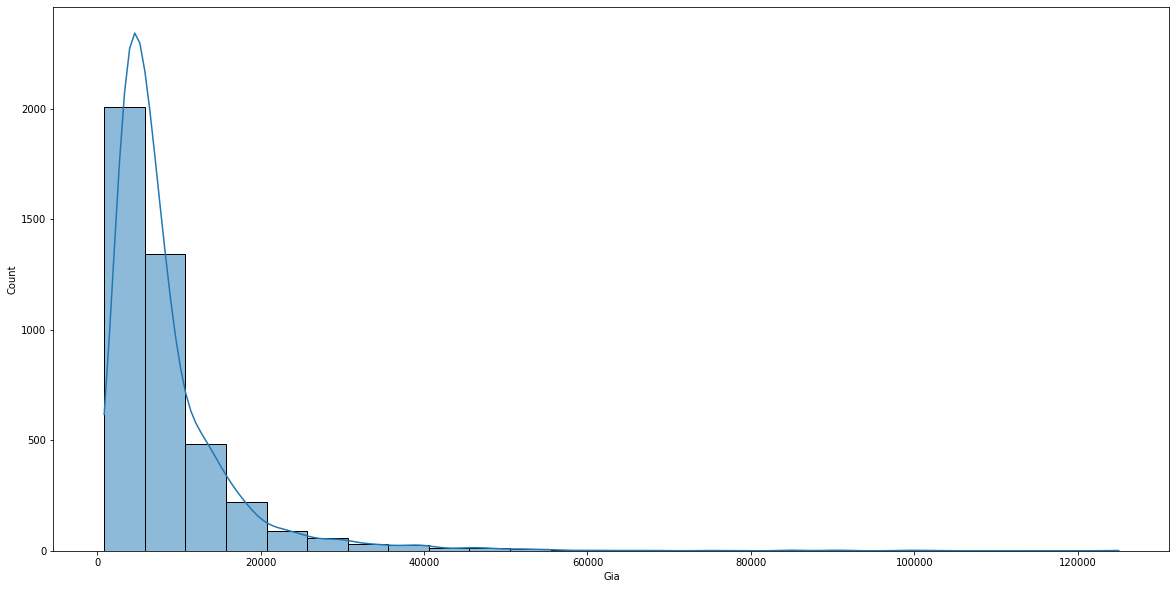

In [40]:
plt.figure(figsize=(20,10))
sns.histplot(df_train['Gia'],kde=True,bins=25)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

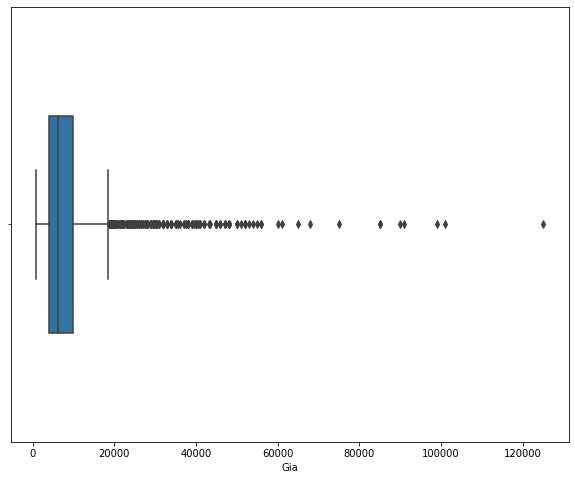

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Gia',data=df_train,width=0.5)
plt.show()

### Nhận xét
* Dữ liệu có khá nhiều giá trị outlier
* Giá nhà tập trung trong khoảng từ 3 - 8 tỷ

In [42]:
df_uni=pd.DataFrame({'cols':df_train.select_dtypes(exclude=['object']).columns})
df_uni['n_unique']=df_uni['cols'].apply(lambda col: len(df_train[col].unique().tolist()))
df_uni['unique']=df_uni['cols'].apply(lambda col: df_train[col].unique().tolist())
df_uni

cols  n_unique  \
0                 ID      4304   
1                Gia       431   
2        Nha_ve_sinh        41   
3           So_phong        38   
4          Chieu_dai      1530   
5               Rong       655   
6          Dien_tich      1303   
7  Dien_tich_su_dung      2053   
8           Hem_rong       321   
9     Duong_mat_tien         2   

                                              unique  
0  [149065, 231326, 184984, 205270, 307136, 26515...  
1  [3700.0, 3900.0, 2000.0, 3800.0, 6500.0, 54000...  
2  [4.0, 1.0, 2.0, 5.0, 3.0, 15.0, 6.0, 11.0, 12....  
3  [3.0, 2.0, 5.0, 4.0, 15.0, 6.0, 8.0, 11.0, 12....  
4  [20.71, 12.9, 3.2, 14.35, 10.0, 30.0, 7.81, 22...  
5  [5.0, 3.0, 4.65, 5.2, 12.0, 2.95, 4.0, 4.93, 5...  
6  [104.5, 42.3, 20.2, 71.8, 52.1, 366.2, 24.0, 8...  
7  [134.7, 87.7, 150.0, 137.6, 70.3, 341.8, 48.0,...  
8  [5.0, 6.1, 3.0, 0.0, 1.5, 6.4, 4.76, 4.0, 2.5,...  
9                                             [0, 1]

### Kiểm tra mối quan hệ giữa giá và đường mặt tiền

0    3251
1    1053
Name: Duong_mat_tien, dtype: int64


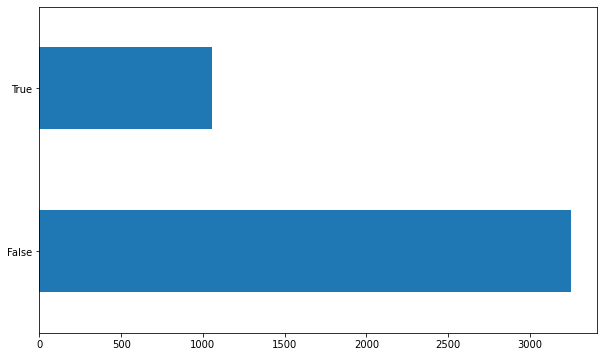

In [43]:
print(df_train['Duong_mat_tien'].value_counts())
df_train['Duong_mat_tien'].value_counts().plot.barh(figsize=(10,6))
plt.yticks([0,1],['False','True'])
plt.show()

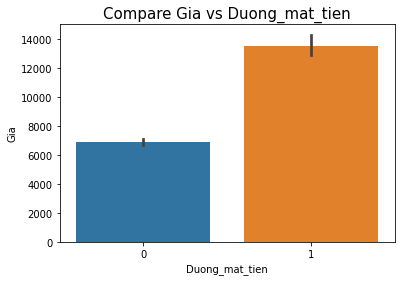

In [44]:
sns.barplot(data=df_train, y='Gia',x='Duong_mat_tien')
plt.title('Compare Gia vs Duong_mat_tien',fontsize=15)
plt.show()

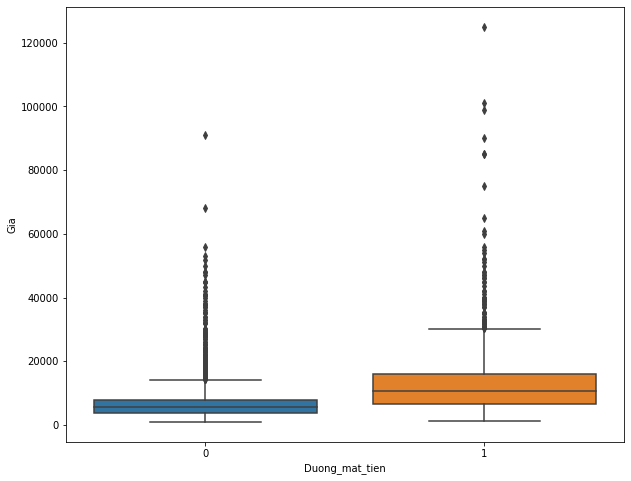

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Gia',data=df_train,x='Duong_mat_tien',)
plt.show()

### Nhận xét
* theo biểu đồ có thể thấy giá của những căng nhà có đường mặt tiền sẽ cao hơn so với những căng nhà không phải đường mặt tiền điều này cũng hợp lý trong thực tế nên có thể nhận xét giá có mối quan hệ với đường mặt tiền

### Kiểm tra mối quan hệ giữa giá và các loại giấy tờ 

Sổ hồng                        4223
Sổ đỏ                            61
Khác                             12
Giấy chứng nhận phường quận       8
Name: Giay_to, dtype: int64


<AxesSubplot:>

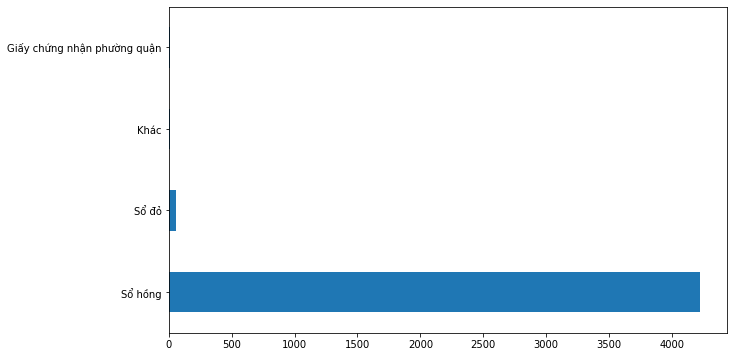

In [46]:
print(df_train['Giay_to'].value_counts())
df_train['Giay_to'].value_counts().plot.barh(figsize=(10,6))

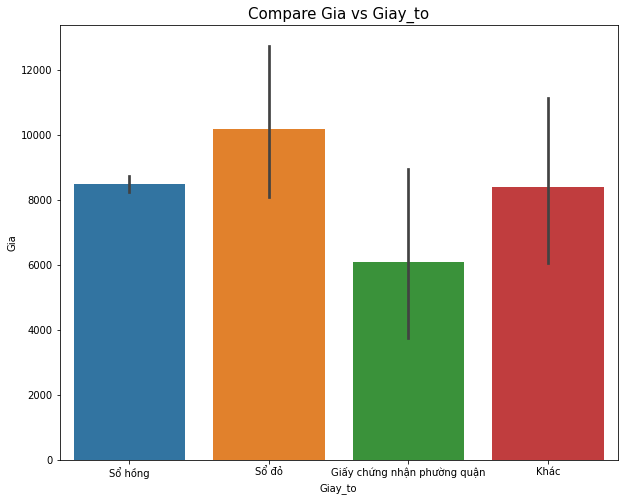

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_train, y='Gia',x='Giay_to')
plt.title('Compare Gia vs Giay_to',fontsize=15)
plt.show()

### Nhận xét
* Ta có thể thấy giá trị của những căng nhà mang sổ đỏ thường rất cao
* Tuy nhiên do sự chênh lệch về dữ liệu hầu như các dữ liệu đều là sổ hồng nên có thể làm mất cân bằng khi đưa yếu tố này vào mô hình

### Kiểm tra tương quan giữa giá và các biến num khác

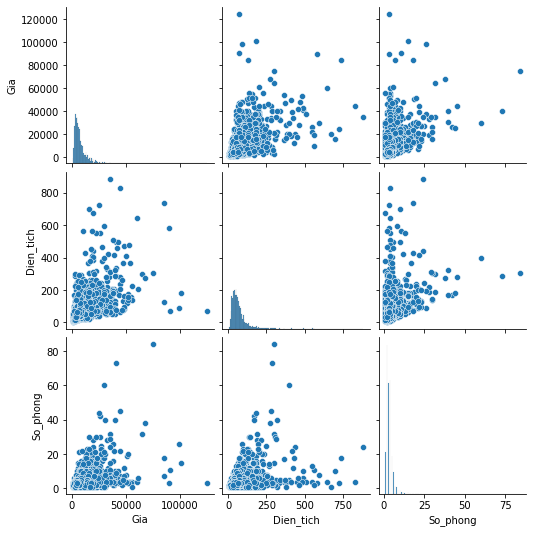

In [48]:
sns.pairplot(df_train[['Gia','Dien_tich','So_phong']])
plt.show()

In [49]:
df_train.drop(['ID','Duong_mat_tien'],axis=1).corr()

Gia  Nha_ve_sinh  So_phong  Chieu_dai      Rong  \
Gia                1.000000     0.453661  0.452770   0.500930  0.409913   
Nha_ve_sinh        0.453661     1.000000  0.955574   0.289761  0.253210   
So_phong           0.452770     0.955574  1.000000   0.310672  0.252082   
Chieu_dai          0.500930     0.289761  0.310672   1.000000  0.223361   
Rong               0.409913     0.253210  0.252082   0.223361  1.000000   
Dien_tich          0.549783     0.356167  0.368096   0.723430  0.619028   
Dien_tich_su_dung  0.533331     0.446490  0.427206   0.416042  0.296963   
Hem_rong          -0.146658     0.023902  0.013354  -0.046339 -0.031226   

                   Dien_tich  Dien_tich_su_dung  Hem_rong  
Gia                 0.549783           0.533331 -0.146658  
Nha_ve_sinh         0.356167           0.446490  0.023902  
So_phong            0.368096           0.427206  0.013354  
Chieu_dai           0.723430           0.416042 -0.046339  
Rong                0.619028           0.296963 -0.031226  
Dien_tich           1.000000           0.452214 -0.054814  
Dien_tich_su_dung   0.452214           1.000000  0.006729  
Hem_rong           -0.054814           0.006729  1.000000

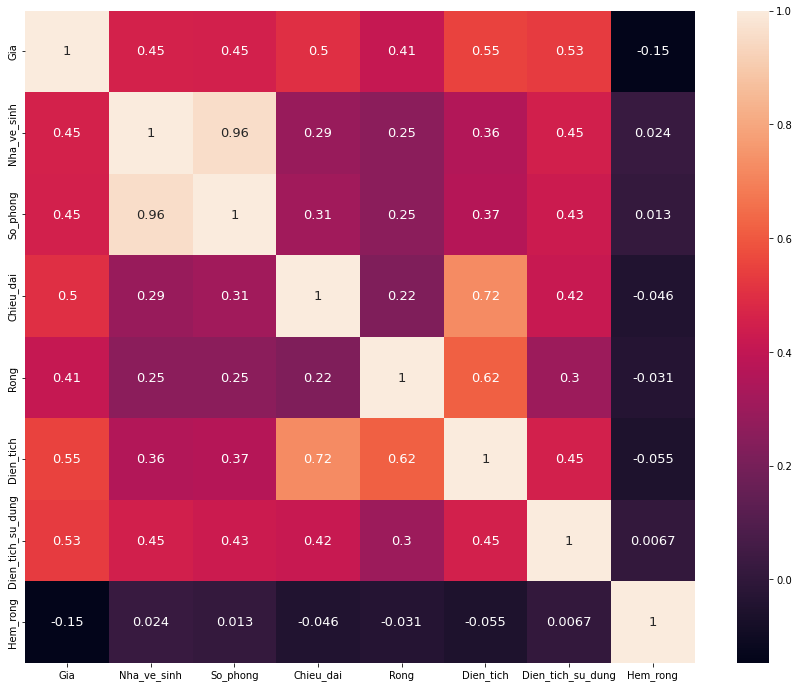

In [50]:
plt.figure(figsize=(15,12))
sns.heatmap(df_train.drop(['ID','Duong_mat_tien'],axis=1).corr(),annot=True,annot_kws={"fontsize":13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Nhận xét
* Các biến num trừ biến hem_rong đều góp phần nhỏ vào việc giải thích biến giá

### Dùng pandas profiling thực hiện EDA

In [51]:
profile = pp.ProfileReport(df_train, title="Pandas Profiling Report cho tập train")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
df_train.head()

ID                                           Noi_dung  \
0  149065  Bán nhà 134.7m2 Tân Hiệp Hóc Môn. Cách Đỗ Văn ...   
1  231326  Bán Nhà Nát Gần Mặt Tiền Đường Hậu Giang P11 Q...   
2  184984  Bán nhà riêng Quận Gò Vấp - Nhà còn mới phù hợ...   
3  205270  Bán Nhà Hẻm Đường Huỳnh Tấn Phát, xã Phú Xuân ...   
4  307136  Bán Nhà Hẻm 3m Lò Siêu, DT: 5,2x10m, Trệt Lửng...   

                                           Dia_chi     Gia  Nha_ve_sinh  \
0  Đường ấp Thới Tây 2, Xã Tân Hiệp, Huyện Hóc Môn  3700.0          4.0   
1               Đường Hậu Giang, Phường 11, Quận 6  3900.0          1.0   
2  Đường Nguyễn Thượng Hiền, Phường 1, Quận Gò Vấp  2000.0          2.0   
3  Đường Huỳnh Tấn Phát, Xã Phú Xuân, Huyện Nhà Bè  3800.0          2.0   
4                Đường Lò Siêu, Phường 16, Quận 11  6500.0          5.0   

   So_phong  Huong  Chieu_dai  Rong  Giay_to  \
0       3.0  Đ.Bắc      20.71  5.00  Sổ hồng   
1       3.0    Tây      12.90  3.00  Sổ hồng   
2       3.0  T.Nam       3.20  4.65  Sổ hồng   
3       2.0  Đ.Bắc      14.35  5.00  Sổ hồng   
4       5.0  T.Nam      10.00  5.20  Sổ hồng   

                                    Cau_truc  Dien_tich  Dien_tich_su_dung  \
0                             1 trệt + 1 lầu      104.5              134.7   
1                                     1 trệt       42.3               87.7   
2                           1 trệt, 1 lửng         20.2              150.0   
3                           1 trệt + 1 lầu         71.8              137.6   
4    1 trệt, 1 lửng, 1 tầng thượng + 2 lầu         52.1               70.3   

   Hem_rong  Duong_mat_tien  \
0       5.0               0   
1       6.1               0   
2       3.0               0   
3       5.0               0   
4       0.0               1   

                                            Tien_ich  \
0  Gần chợ, siêu thị Gần bệnh viện Gần công viên,...   
1  Gần chợ, siêu thị Gần công viên, trung tâm Di ...   
2   Gần chợ, siêu thị Gần công viên, trung tâm Gầ...   
3   Gần chợ, siêu thị Gần bệnh viện Gần công viên...   
4                                                NaN   

                      Duong        Phuong            Quan  
0       Đường ấp Thới Tây 2   Xã Tân Hiệp   Huyện Hóc Môn  
1           Đường Hậu Giang     Phường 11          Quận 6  
2  Đường Nguyễn Thượng Hiền      Phường 1     Quận Gò Vấp  
3      Đường Huỳnh Tấn Phát   Xã Phú Xuân    Huyện Nhà Bè  
4             Đường Lò Siêu     Phường 16         Quận 11

### Xây dựng tập train 

In [53]:
X_train = df_train.drop(['ID','Noi_dung','Dia_chi','Tien_ich','Gia','Duong','Phuong','Cau_truc','Hem_rong','Huong','Giay_to'], axis = 1)
X_train.head()

Nha_ve_sinh  So_phong  Chieu_dai  Rong  Dien_tich  Dien_tich_su_dung  \
0          4.0       3.0      20.71  5.00      104.5              134.7   
1          1.0       3.0      12.90  3.00       42.3               87.7   
2          2.0       3.0       3.20  4.65       20.2              150.0   
3          2.0       2.0      14.35  5.00       71.8              137.6   
4          5.0       5.0      10.00  5.20       52.1               70.3   

   Duong_mat_tien            Quan  
0               0   Huyện Hóc Môn  
1               0          Quận 6  
2               0     Quận Gò Vấp  
3               0    Huyện Nhà Bè  
4               1         Quận 11

In [54]:
y_train = df_train['Gia']
y_train

0       3700.0
1       3900.0
2       2000.0
3       3800.0
4       6500.0
         ...  
4381    6600.0
4382    4600.0
4383    3850.0
4384    4200.0
4385    4700.0
Name: Gia, Length: 4304, dtype: float64

In [55]:
X_train = pd.get_dummies(X_train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 0 to 4385
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nha_ve_sinh             4304 non-null   float64
 1   So_phong                4304 non-null   float64
 2   Chieu_dai               4304 non-null   float64
 3   Rong                    4304 non-null   float64
 4   Dien_tich               4304 non-null   float64
 5   Dien_tich_su_dung       4304 non-null   float64
 6   Duong_mat_tien          4304 non-null   int64  
 7   Quan_ Huyện Bình Chánh  4304 non-null   uint8  
 8   Quan_ Huyện Hóc Môn     4304 non-null   uint8  
 9   Quan_ Huyện Nhà Bè      4304 non-null   uint8  
 10  Quan_ Quận 1            4304 non-null   uint8  
 11  Quan_ Quận 10           4304 non-null   uint8  
 12  Quan_ Quận 11           4304 non-null   uint8  
 13  Quan_ Quận 12           4304 non-null   uint8  
 14  Quan_ Quận 2            4304 non-null   

### Xây dựng tập test

In [56]:
X_test = df_xtest.drop(['ID','Noi_dung','Dia_chi','Tien_ich','Duong','Phuong','Cau_truc','Hem_rong','Huong','Giay_to'], axis = 1)
X_test.head()

Nha_ve_sinh  So_phong  Chieu_dai   Rong  Dien_tich  Dien_tich_su_dung  \
0          1.0       2.0      10.29   3.98     47.600               95.3   
1         11.0      11.0      10.00   5.60     56.600              186.0   
2          6.0       6.0      48.00  30.00      1.177              309.4   
3          3.0       2.0       6.00   4.00     24.000               72.0   
4          1.0       2.0       9.30   2.90     28.000               56.0   

   Duong_mat_tien             Quan  
0               0      Quận Gò Vấp  
1               1   Quận Phú Nhuận  
2               0     Quận Thủ Đức  
3               1           Quận 7  
4               0          Quận 10

In [57]:
X_test = pd.get_dummies(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nha_ve_sinh             1458 non-null   float64
 1   So_phong                1458 non-null   float64
 2   Chieu_dai               1458 non-null   float64
 3   Rong                    1458 non-null   float64
 4   Dien_tich               1458 non-null   float64
 5   Dien_tich_su_dung       1458 non-null   float64
 6   Duong_mat_tien          1458 non-null   int64  
 7   Quan_ Huyện Bình Chánh  1458 non-null   uint8  
 8   Quan_ Huyện Hóc Môn     1458 non-null   uint8  
 9   Quan_ Huyện Nhà Bè      1458 non-null   uint8  
 10  Quan_ Quận 1            1458 non-null   uint8  
 11  Quan_ Quận 10           1458 non-null   uint8  
 12  Quan_ Quận 11           1458 non-null   uint8  
 13  Quan_ Quận 12           1458 non-null   uint8  
 14  Quan_ Quận 2            1458 non-null   

In [58]:
y_test = df_ytest.iloc[:,1]
y_test

0        3800.0
1       11000.0
2       78000.0
3        5050.0
4        3900.0
         ...   
1453     7900.0
1454     6000.0
1455     5100.0
1456    47000.0
1457     5700.0
Name: Gia (triệu), Length: 1458, dtype: float64

In [59]:
sc = StandardScaler()

In [60]:
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

### Lựa chọn mô hình

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import time
import warnings
warnings.filterwarnings('ignore')

models=[LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
scores=[]
train_times=[]
names=[]

In [62]:
for model in models:
    start=time.time()
    scores.append(cross_val_score(model, X_train_scale, y_train,scoring="r2", cv=10).mean())
    end=time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)
    
df_time_score =pd.DataFrame(scores,columns=['Score'],index=range(len(models)))
df_time_score.insert(1,'Time',pd.Series(train_times))
df_time_score.insert(0,'Model',pd.Series(names))
df_time_score.head(10)

Model     Score       Time
0       LinearRegression  0.597527   0.063033
1    KNeighborsRegressor  0.607835   0.281284
2  DecisionTreeRegressor  0.342964   0.296205
3  RandomForestRegressor  0.608017  17.680704

### Nhận xét
* Có thể thấy điểm của các mô hình không cao có thể do ảnh hưởng của các giá trị outlier
* Lựa chọn mô hình linear để thử dự báo cho tập test và so sánh

### Lựa chọn mô hình linear regression để dự báo

In [63]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [64]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.6218910487115672
0.5345007397660215


In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred= model.predict(X_test)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(r2,mse,mae)

0.5345007397660215 39457000.68116134 3069.501077397223


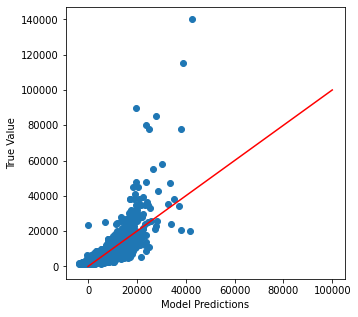

In [66]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000],'-r' )
plt.show()

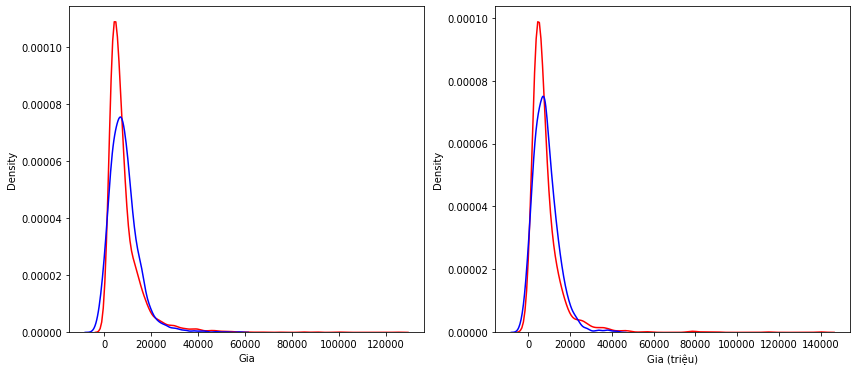

In [67]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r",
label="Actual Train Values")
sns.distplot(model.predict(X_train), hist=False, color="b",
label="Predicted Train Values", ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r",
label="Actual Test Values")
sns.distplot(model.predict(X_test), hist=False, color="b",
label="Predicted Test Values" , ax=ax2)
plt.show()

### Nhận xét
* Mô hình chỉ giải thích được tầm 53% so với thực tế nguyên nhân có thể do bị ảnh hưởng bởi các giá trị outlier 
* Thực hiện chia tập dữ liệu thành 2 phần 1 là dữ liệu khi không có outlier và 1 bộ dữ liệu gồm outlier
* Cho thực hiện chạy mô hình regress trên bộ dữ liệu khi không có outlier và xem kết quả

### Thực hiện chia dữ liệu trên tập train

In [68]:
print(df_train['Gia'].quantile([0,0.25,0.5,0.75,1]))

0.00       870.0
0.25      4000.0
0.50      6200.0
0.75      9800.0
1.00    125000.0
Name: Gia, dtype: float64


### Nhận xét
* ta có thể thấy 75% dữ liệu trong tập train không có sự gia tăng nào đột biến trong giá
* từ 75% trở đi có sự gia tăng mạnh về giá
* Tính IQR để xác định outlier 

In [69]:
IQR = df_train['Gia'].quantile(0.75) - df_train['Gia'].quantile(0.25)
IQR

5800.0

In [70]:
limit_iqr = 1.5*IQR
limit_iqr

8700.0

In [71]:
lower_iqr = df_train['Gia'].quantile(0.25) - limit_iqr
upper_iqr = df_train['Gia'].quantile(0.75) + limit_iqr
print(lower_iqr)
print(upper_iqr)

-4700.0
18500.0


In [72]:
df_outlier_train=df_train[df_train['Gia']>upper_iqr]
df_outlier_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 5 to 4349
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 313 non-null    int64  
 1   Noi_dung           313 non-null    object 
 2   Dia_chi            313 non-null    object 
 3   Gia                313 non-null    float64
 4   Nha_ve_sinh        313 non-null    float64
 5   So_phong           313 non-null    float64
 6   Huong              313 non-null    object 
 7   Chieu_dai          313 non-null    float64
 8   Rong               313 non-null    float64
 9   Giay_to            313 non-null    object 
 10  Cau_truc           313 non-null    object 
 11  Dien_tich          313 non-null    float64
 12  Dien_tich_su_dung  313 non-null    float64
 13  Hem_rong           313 non-null    float64
 14  Duong_mat_tien     313 non-null    int64  
 15  Tien_ich           253 non-null    object 
 16  Duong              313 no

In [73]:
df_outlier_train.describe()

ID            Gia  Nha_ve_sinh    So_phong   Chieu_dai  \
count     313.000000     313.000000   313.000000  313.000000  313.000000   
mean   264423.479233   30437.060703     8.012780    8.252396   23.494665   
std     97592.165446   14258.003836    10.109647   10.023859   10.421472   
min     27751.000000   18600.000000     1.000000    1.000000    4.000000   
25%    190260.000000   22000.000000     3.000000    3.000000   17.500000   
50%    301193.000000   26000.000000     5.000000    5.000000   21.220000   
75%    347947.000000   35000.000000     8.000000    8.000000   27.000000   
max    369420.000000  125000.000000    85.000000   84.000000  101.460000   

             Rong   Dien_tich  Dien_tich_su_dung    Hem_rong  Duong_mat_tien  
count  313.000000  313.000000         313.000000  313.000000      313.000000  
mean     7.133543  165.631629         296.560284    1.834249        0.638978  
std      4.217331  136.950664         206.721375    2.799276        0.481066  
min      2.680000   35.800000           1.469000    0.000000        0.000000  
25%      4.000000   80.000000         142.600000    0.000000        0.000000  
50%      5.700000  125.000000         243.800000    0.000000        1.000000  
75%      8.240000  186.100000         390.500000    3.500000        1.000000  
max     25.600000  885.400000         991.400000   12.000000        1.000000

In [74]:
df_outlier_train.drop(['ID','Duong_mat_tien'],axis=1).corr()

Gia  Nha_ve_sinh  So_phong  Chieu_dai      Rong  \
Gia                1.000000     0.223730  0.220016   0.252834  0.347648   
Nha_ve_sinh        0.223730     1.000000  0.984712   0.106273  0.193850   
So_phong           0.220016     0.984712  1.000000   0.106674  0.182175   
Chieu_dai          0.252834     0.106273  0.106674   1.000000  0.189315   
Rong               0.347648     0.193850  0.182175   0.189315  1.000000   
Dien_tich          0.253954     0.185170  0.177039   0.610896  0.624672   
Dien_tich_su_dung  0.231006     0.271700  0.243112   0.141815  0.202371   
Hem_rong          -0.095001     0.114461  0.109710  -0.054816  0.091499   

                   Dien_tich  Dien_tich_su_dung  Hem_rong  
Gia                 0.253954           0.231006 -0.095001  
Nha_ve_sinh         0.185170           0.271700  0.114461  
So_phong            0.177039           0.243112  0.109710  
Chieu_dai           0.610896           0.141815 -0.054816  
Rong                0.624672           0.202371  0.091499  
Dien_tich           1.000000           0.230692  0.037444  
Dien_tich_su_dung   0.230692           1.000000  0.040031  
Hem_rong            0.037444           0.040031  1.000000

### Tập train khi loại bỏ các giá trị outlier

In [75]:
df_train_bo_outlier=df_train.drop(df_outlier_train.index)
df_train_bo_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 0 to 4385
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3991 non-null   int64  
 1   Noi_dung           3991 non-null   object 
 2   Dia_chi            3991 non-null   object 
 3   Gia                3991 non-null   float64
 4   Nha_ve_sinh        3991 non-null   float64
 5   So_phong           3991 non-null   float64
 6   Huong              3991 non-null   object 
 7   Chieu_dai          3991 non-null   float64
 8   Rong               3991 non-null   float64
 9   Giay_to            3991 non-null   object 
 10  Cau_truc           3991 non-null   object 
 11  Dien_tich          3991 non-null   float64
 12  Dien_tich_su_dung  3991 non-null   float64
 13  Hem_rong           3991 non-null   float64
 14  Duong_mat_tien     3991 non-null   int64  
 15  Tien_ich           3228 non-null   object 
 16  Duong              3991 

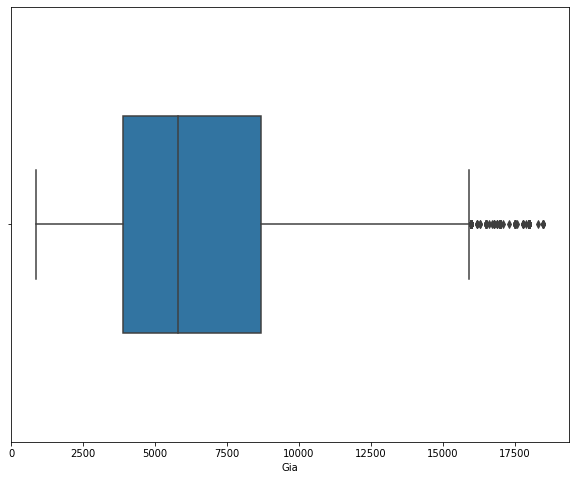

In [76]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Gia',data=df_train_bo_outlier,width=0.5)
plt.show()

In [77]:
df_train_bo_outlier.drop(['ID','Duong_mat_tien'],axis=1).corr()

Gia  Nha_ve_sinh  So_phong  Chieu_dai      Rong  \
Gia                1.000000     0.429667  0.430523   0.470394  0.256440   
Nha_ve_sinh        0.429667     1.000000  0.889843   0.274466  0.157765   
So_phong           0.430523     0.889843  1.000000   0.317893  0.164793   
Chieu_dai          0.470394     0.274466  0.317893   1.000000  0.108641   
Rong               0.256440     0.157765  0.164793   0.108641  1.000000   
Dien_tich          0.470003     0.311860  0.353208   0.746586  0.545952   
Dien_tich_su_dung  0.480923     0.461139  0.442089   0.376491  0.192781   
Hem_rong          -0.061388     0.088173  0.070825   0.014326 -0.002276   

                   Dien_tich  Dien_tich_su_dung  Hem_rong  
Gia                 0.470003           0.480923 -0.061388  
Nha_ve_sinh         0.311860           0.461139  0.088173  
So_phong            0.353208           0.442089  0.070825  
Chieu_dai           0.746586           0.376491  0.014326  
Rong                0.545952           0.192781 -0.002276  
Dien_tich           1.000000           0.396149  0.002076  
Dien_tich_su_dung   0.396149           1.000000  0.083857  
Hem_rong            0.002076           0.083857  1.000000

### Thêm cột giá đơn vị triệu vào tập test để xem các giá trị outlier

In [78]:
df_xtest['Gia']=df_ytest.iloc[:,1]
df_xtest.head()

ID                                           Noi_dung  \
0  356331  Nhà bán Quận Gò Vấp - Hẻm xe ba gác - Khu dân ...   
1  314792  CẦN BÁN NHÀ MẶT TIỀN ĐƯỜNG CAO THẮNG QUẬN PHÚ ...   
2  338448  Chính chủ bán gấp căn biệt thự vườn, hẻm xe hơ...   
3  349168  Bán Nhà Căn Góc Mặt Tiền Đường Số Phường Tân Q...   
4  357978  Bán Nhà Hai Mặt Hẻm Cách Mạng Tháng Tám - Phườ...   

                                         Dia_chi  Nha_ve_sinh  So_phong  \
0   Đường Phạm Văn Chiêu, Phường 14, Quận Gò Vấp          1.0       2.0   
1     Đường Cao Thắng, Phường 17, Quận Phú Nhuận         11.0      11.0   
2   Đường Số 12, Phường Trường Thọ, Quận Thủ Đức          6.0       6.0   
3            Đường Số 77, Phường Tân Quy, Quận 7          3.0       2.0   
4  Đường Cách Mạng Tháng Tám, Phường 13, Quận 10          1.0       2.0   

   Huong  Chieu_dai   Rong  Giay_to                              Cau_truc  \
0  Đ.Nam      10.29   3.98  Sổ hồng                        1 trệt + 1 lầu   
1  Đ.Nam      10.00   5.60  Sổ hồng    1 trệt, 1 lửng, 1 áp mái + 2 lầu     
2  Đ.Bắc      48.00  30.00  Sổ hồng                      1 trệt + 1 lầu     
3    Nam       6.00   4.00  Sổ hồng                        1 trệt + 2 lầu   
4  T.Bắc       9.30   2.90  Sổ hồng                      1 trệt + 1 lầu     

   Dien_tich  Dien_tich_su_dung  Hem_rong  Duong_mat_tien  \
0     47.600               95.3       2.0               0   
1     56.600              186.0       0.0               1   
2      1.177              309.4       4.0               0   
3     24.000               72.0       0.0               1   
4     28.000               56.0       3.0               0   

                                            Tien_ich  \
0  Gần chợ, siêu thị Gần trường học Gần mặt tiền ...   
1                                                NaN   
2   Gần chợ, siêu thị Gần công viên, trung tâm Gầ...   
3  Gần chợ, siêu thị Gần công viên, trung tâm Gần...   
4   Gần chợ, siêu thị Gần trường học Gần mặt tiền...   

                       Duong              Phuong             Quan      Gia  
0       Đường Phạm Văn Chiêu           Phường 14      Quận Gò Vấp   3800.0  
1            Đường Cao Thắng           Phường 17   Quận Phú Nhuận  11000.0  
2                Đường Số 12   Phường Trường Thọ     Quận Thủ Đức  78000.0  
3                Đường Số 77      Phường Tân Quy           Quận 7   5050.0  
4  Đường Cách Mạng Tháng Tám           Phường 13          Quận 10   3900.0

In [79]:
print(df_xtest['Gia'].quantile([0.25,0.5,0.75,1]))

0.25      4100.0
0.50      6000.0
0.75      9500.0
1.00    140000.0
Name: Gia, dtype: float64


### Nhận xét
* ta có thể thấy 75% dữ liệu trong tập test cũng không có sự gia tăng nào đột biến trong giá
* từ 75% trở đi có sự gia tăng mạnh về giá
* Tính IQR để xác định outlier tương tự tập train

In [80]:
IQR_test = df_xtest['Gia'].quantile(0.75) - df_xtest['Gia'].quantile(0.25)
IQR_test

5400.0

In [81]:
limit_iqr_test = 1.5*IQR_test
limit_iqr_test

8100.0

In [82]:
upper_iqr_test = df_xtest['Gia'].quantile(0.75) + limit_iqr_test
upper_iqr_test

17600.0

In [83]:
df_outlier_test=df_xtest[df_xtest['Gia']>upper_iqr_test]
df_outlier_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 2 to 1456
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 112 non-null    int64  
 1   Noi_dung           112 non-null    object 
 2   Dia_chi            112 non-null    object 
 3   Nha_ve_sinh        112 non-null    float64
 4   So_phong           112 non-null    float64
 5   Huong              112 non-null    object 
 6   Chieu_dai          112 non-null    float64
 7   Rong               112 non-null    float64
 8   Giay_to            112 non-null    object 
 9   Cau_truc           112 non-null    object 
 10  Dien_tich          112 non-null    float64
 11  Dien_tich_su_dung  112 non-null    float64
 12  Hem_rong           112 non-null    float64
 13  Duong_mat_tien     112 non-null    int64  
 14  Tien_ich           91 non-null     object 
 15  Duong              112 non-null    object 
 16  Phuong             112 no

In [84]:
df_outlier_test.describe()

ID  Nha_ve_sinh    So_phong   Chieu_dai        Rong  \
count     112.000000   112.000000  112.000000  112.000000  112.000000   
mean   277453.687500     5.937500    6.401786   21.179286    7.504375   
std     96614.559807     4.750119    4.994519    8.931934    4.850218   
min     13813.000000     1.000000    1.000000    7.000000    3.000000   
25%    197593.500000     3.000000    4.000000   15.000000    4.200000   
50%    322378.000000     5.000000    5.000000   20.000000    6.125000   
75%    352699.000000     6.250000    7.000000   25.000000    9.000000   
max    368073.000000    28.000000   28.000000   56.440000   33.330000   

        Dien_tich  Dien_tich_su_dung    Hem_rong  Duong_mat_tien  \
count  112.000000         112.000000  112.000000      112.000000   
mean   144.222116         307.043750    1.900268        0.633929   
std    110.618450         174.026901    2.961416        0.483894   
min      1.177000          26.100000    0.000000        0.000000   
25%     77.075000         199.225000    0.000000        0.000000   
50%    114.800000         269.900000    0.000000        1.000000   
75%    166.575000         376.400000    4.000000        1.000000   
max    690.200000         882.400000   16.000000        1.000000   

                 Gia  
count     112.000000  
mean    31554.196429  
std     19306.443850  
min     18000.000000  
25%     20875.000000  
50%     25785.000000  
75%     34700.000000  
max    140000.000000

In [85]:
df_outlier_test.drop(['ID','Duong_mat_tien'],axis=1).corr()

Nha_ve_sinh  So_phong  Chieu_dai      Rong  Dien_tich  \
Nha_ve_sinh           1.000000  0.926099   0.086155 -0.115495   0.006070   
So_phong              0.926099  1.000000   0.055510 -0.090924   0.014951   
Chieu_dai             0.086155  0.055510   1.000000  0.281873   0.517181   
Rong                 -0.115495 -0.090924   0.281873  1.000000   0.404721   
Dien_tich             0.006070  0.014951   0.517181  0.404721   1.000000   
Dien_tich_su_dung     0.478862  0.458862   0.284535 -0.039540   0.276768   
Hem_rong              0.101555  0.113997  -0.046533  0.183969   0.133022   
Gia                   0.079369  0.143266   0.193346  0.554832   0.039979   

                   Dien_tich_su_dung  Hem_rong       Gia  
Nha_ve_sinh                 0.478862  0.101555  0.079369  
So_phong                    0.458862  0.113997  0.143266  
Chieu_dai                   0.284535 -0.046533  0.193346  
Rong                       -0.039540  0.183969  0.554832  
Dien_tich                   0.276768  0.133022  0.039979  
Dien_tich_su_dung           1.000000 -0.164090  0.118185  
Hem_rong                   -0.164090  1.000000 -0.108023  
Gia                         0.118185 -0.108023  1.000000

### Tập test khi loại bỏ các giá trị outlier

In [86]:
df_test_bo_outlier=df_xtest.drop(df_outlier_test.index)
df_test_bo_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1457
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1346 non-null   int64  
 1   Noi_dung           1346 non-null   object 
 2   Dia_chi            1346 non-null   object 
 3   Nha_ve_sinh        1346 non-null   float64
 4   So_phong           1346 non-null   float64
 5   Huong              1346 non-null   object 
 6   Chieu_dai          1346 non-null   float64
 7   Rong               1346 non-null   float64
 8   Giay_to            1346 non-null   object 
 9   Cau_truc           1346 non-null   object 
 10  Dien_tich          1346 non-null   float64
 11  Dien_tich_su_dung  1346 non-null   float64
 12  Hem_rong           1346 non-null   float64
 13  Duong_mat_tien     1346 non-null   int64  
 14  Tien_ich           1082 non-null   object 
 15  Duong              1346 non-null   object 
 16  Phuong             1346 

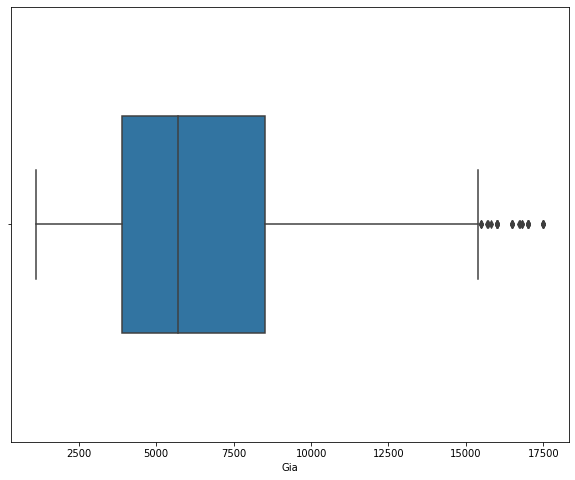

In [87]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Gia',data=df_test_bo_outlier,width=0.5)
plt.show()

### Xây dựng tập train khi không có outlier

In [88]:
X_train_ko_outlier = df_train_bo_outlier.drop(['ID','Noi_dung','Dia_chi','Tien_ich','Gia','Duong','Phuong','Cau_truc','Hem_rong','Huong','Giay_to'], axis = 1)
X_train_ko_outlier.head()

Nha_ve_sinh  So_phong  Chieu_dai  Rong  Dien_tich  Dien_tich_su_dung  \
0          4.0       3.0      20.71  5.00      104.5              134.7   
1          1.0       3.0      12.90  3.00       42.3               87.7   
2          2.0       3.0       3.20  4.65       20.2              150.0   
3          2.0       2.0      14.35  5.00       71.8              137.6   
4          5.0       5.0      10.00  5.20       52.1               70.3   

   Duong_mat_tien            Quan  
0               0   Huyện Hóc Môn  
1               0          Quận 6  
2               0     Quận Gò Vấp  
3               0    Huyện Nhà Bè  
4               1         Quận 11

In [89]:
y_train_ko_outlier = df_train_bo_outlier['Gia']
y_train_ko_outlier

0       3700.0
1       3900.0
2       2000.0
3       3800.0
4       6500.0
         ...  
4381    6600.0
4382    4600.0
4383    3850.0
4384    4200.0
4385    4700.0
Name: Gia, Length: 3991, dtype: float64

In [90]:
X_train_ko_outlier = pd.get_dummies(X_train_ko_outlier)
X_train_ko_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 0 to 4385
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nha_ve_sinh             3991 non-null   float64
 1   So_phong                3991 non-null   float64
 2   Chieu_dai               3991 non-null   float64
 3   Rong                    3991 non-null   float64
 4   Dien_tich               3991 non-null   float64
 5   Dien_tich_su_dung       3991 non-null   float64
 6   Duong_mat_tien          3991 non-null   int64  
 7   Quan_ Huyện Bình Chánh  3991 non-null   uint8  
 8   Quan_ Huyện Hóc Môn     3991 non-null   uint8  
 9   Quan_ Huyện Nhà Bè      3991 non-null   uint8  
 10  Quan_ Quận 1            3991 non-null   uint8  
 11  Quan_ Quận 10           3991 non-null   uint8  
 12  Quan_ Quận 11           3991 non-null   uint8  
 13  Quan_ Quận 12           3991 non-null   uint8  
 14  Quan_ Quận 2            3991 non-null   

### Xây dựng tập test khi không có outlier

In [91]:
X_test_ko_outlier = df_test_bo_outlier.drop(['ID','Noi_dung','Dia_chi','Tien_ich','Gia','Duong','Phuong','Cau_truc','Hem_rong','Huong','Giay_to'], axis = 1)
X_test_ko_outlier.head()

Nha_ve_sinh  So_phong  Chieu_dai  Rong  Dien_tich  Dien_tich_su_dung  \
0          1.0       2.0      10.29  3.98       47.6               95.3   
1         11.0      11.0      10.00  5.60       56.6              186.0   
3          3.0       2.0       6.00  4.00       24.0               72.0   
4          1.0       2.0       9.30  2.90       28.0               56.0   
5          2.0       2.0      12.42  4.00       49.0               71.7   

   Duong_mat_tien             Quan  
0               0      Quận Gò Vấp  
1               1   Quận Phú Nhuận  
3               1           Quận 7  
4               0          Quận 10  
5               0          Quận 12

In [92]:
y_test_ko_outlier = df_test_bo_outlier['Gia']
y_test_ko_outlier

0        3800.0
1       11000.0
3        5050.0
4        3900.0
5        2800.0
         ...   
1452     5000.0
1453     7900.0
1454     6000.0
1455     5100.0
1457     5700.0
Name: Gia, Length: 1346, dtype: float64

In [93]:
X_test_ko_outlier = pd.get_dummies(X_test_ko_outlier)
X_test_ko_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1457
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nha_ve_sinh             1346 non-null   float64
 1   So_phong                1346 non-null   float64
 2   Chieu_dai               1346 non-null   float64
 3   Rong                    1346 non-null   float64
 4   Dien_tich               1346 non-null   float64
 5   Dien_tich_su_dung       1346 non-null   float64
 6   Duong_mat_tien          1346 non-null   int64  
 7   Quan_ Huyện Bình Chánh  1346 non-null   uint8  
 8   Quan_ Huyện Hóc Môn     1346 non-null   uint8  
 9   Quan_ Huyện Nhà Bè      1346 non-null   uint8  
 10  Quan_ Quận 1            1346 non-null   uint8  
 11  Quan_ Quận 10           1346 non-null   uint8  
 12  Quan_ Quận 11           1346 non-null   uint8  
 13  Quan_ Quận 12           1346 non-null   uint8  
 14  Quan_ Quận 2            1346 non-null   

In [94]:
X_train_ko_outlier_scale = sc.fit_transform(X_train_ko_outlier)
X_test_ko_outleir_scale = sc.fit_transform(X_test_ko_outlier)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import time
import warnings
warnings.filterwarnings('ignore')

models=[LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
scores=[]
train_times=[]
names=[]

In [96]:
for model in models:
    start=time.time()
    scores.append(cross_val_score(model, X_train_ko_outlier_scale, y_train_ko_outlier,scoring="r2", cv=10).mean())
    end=time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)
    
df_time_score =pd.DataFrame(scores,columns=['Score'],index=range(len(models)))
df_time_score.insert(1,'Time',pd.Series(train_times))
df_time_score.insert(0,'Model',pd.Series(names))
df_time_score.head(10)

Model     Score       Time
0       LinearRegression  0.618254   0.057173
1    KNeighborsRegressor  0.604764   0.244379
2  DecisionTreeRegressor  0.282443   0.240357
3  RandomForestRegressor  0.620786  14.799381

### Vẫn sử dụng mô hình linear để dự báo tập test

In [97]:
model = LinearRegression()
model.fit(X_train_ko_outlier,y_train_ko_outlier)

LinearRegression()

In [98]:
print(model.score(X_train_ko_outlier,y_train_ko_outlier))
print(model.score(X_test_ko_outlier,y_test_ko_outlier))

0.6288568675008166
0.6110543392932148


In [99]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred= model.predict(X_test_ko_outlier)
r2=r2_score(y_test_ko_outlier,y_pred)
mse=mean_squared_error(y_test_ko_outlier,y_pred)
mae=mean_absolute_error(y_test_ko_outlier,y_pred)
print(r2,mse,mae)

0.6110543392932148 5135683.334100605 1654.3154602699067


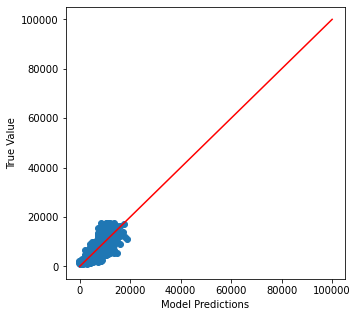

In [100]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X_test_ko_outlier),y_test_ko_outlier)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000],'-r' )
plt.show()

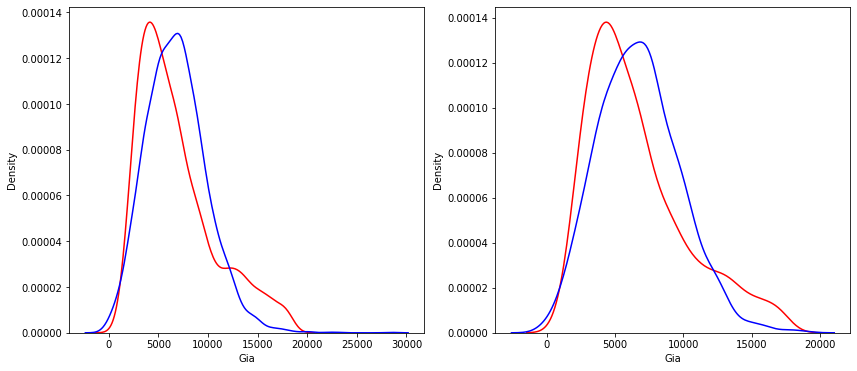

In [101]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train_ko_outlier, hist=False, color="r",
label="Actual Train Values")
sns.distplot(model.predict(X_train_ko_outlier), hist=False, color="b",
label="Predicted Train Values", ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test_ko_outlier, hist=False, color="r",
label="Actual Test Values")
sns.distplot(model.predict(X_test_ko_outlier), hist=False, color="b",
label="Predicted Test Values" , ax=ax2)
plt.show()

### Nhận xét
* Mô hình khi loại bỏ outlier được cải thiện điểm ở cả tập train và test 
* Mô hình cũng giải thích được tầm 61% so với thực tế tăng khoảng 8% khi chưa loại bỏ các giá trị outlier

### Sử dụng Adabosst regressor

In [102]:
from sklearn.ensemble import AdaBoostRegressor

In [103]:
ml = LinearRegression()

In [104]:
clf = AdaBoostRegressor(n_estimators=100,base_estimator=ml,learning_rate=1)

In [105]:
clf.fit(X_train_ko_outlier, y_train_ko_outlier)

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=1,
                  n_estimators=100)

In [106]:
clf.score(X_train_ko_outlier, y_train_ko_outlier)

0.6177282189619433

In [107]:
clf.score(X_test_ko_outlier, y_test_ko_outlier)

0.5948616861089169

In [108]:
print("Mean squared error: %.2f"% mean_squared_error(y_test_ko_outlier, clf.predict(X_test_ko_outlier)))
print('Variance score: %.2f' % clf.score(X_test_ko_outlier, y_test_ko_outlier))

Mean squared error: 5349492.99
Variance score: 0.59


### Nhận xét
* Adaboost cũng không cải thiện được nhiều so với khi sử dụng mô hình linear thông thường

### Sử dụng XgBoost

In [109]:
import xgboost as xgb

In [110]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_ko_outlier, y_train_ko_outlier)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [111]:
xgb_model.score(X_train_ko_outlier, y_train_ko_outlier)

0.9504736672266123

In [112]:
xgb_model.score(X_test_ko_outlier, y_test_ko_outlier)

0.6272043055171524

In [113]:
print("Mean squared error: %.2f" % mean_squared_error(y_test_ko_outlier, xgb_model.predict(X_test_ko_outlier)))
print('Variance score: %.2f' % xgb_model.score(X_test_ko_outlier, y_test_ko_outlier))

Mean squared error: 4922437.32
Variance score: 0.63


### Nhận xét
* khi sử dụng Xgboost với dữ liệu không outlier thì mô hình bị overfitting 